In [72]:
import pandas as pd
import numpy as np
import glob
import os
import re
import matplotlib.pyplot as plt

In [55]:
clear all

In [34]:
#Importing data files for Loading, Warm up Resistance vs Temperature measurements

In [56]:
path = '/home/ad.ufl.edu/shubham.sinha/repos/remob2/data/processed/WarmUp/' # path to the files directory
file_list = os.listdir(path) # list of all the files in the directory
fileOrder = [] #initializing an empty list to contain file number chronologically
for file in file_list:
    fileOrder.append(re.split('_',file)[0])
fileOrder =  [int(x) for x in fileOrder]  #Converting the File numbers to integer for sorting

In [57]:
fileOrder

[43, 32, 41, 20, 23, 10, 29, 2, 33, 17, 26, 14]

In [58]:
lst = zip(fileOrder, file_list)
print([i for i in lst])

[(43, '43_Re0p10Mo0p90B2_OmniDAC_Run1_96p0bar_160p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (32, '32_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_88p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (41, '41_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_warming_292pK_laseroff_V12I34_0p3mA_Vmode_1'), (20, '20_Re0p10Mo0p90B2_OmniDAC_Run1_53p0bar_53p3GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (23, '23_Re0p10Mo0p90B2_OmniDAC_Run1_55p5bar_62p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (10, '10_Re0p10Mo0p90B2_OmniDAC_Run1_25pbar_18p6GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (29, '29_Re0p10Mo0p90B2_OmniDAC_Run1_62p0bar_79p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (2, '2_Re0p10Mo0p90B2_OmniDAC_Run1_10pbar_9p6GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (33, '33_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_88p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (17, '17_Re0p10Mo0p90B2_OmniDAC_Run1_49p5bar_43p8GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1'), (26, '26_Re

In [59]:
file_list  = [ x for _, x in sorted(zip(fileOrder, file_list))] #Sorting the files list according increasing pressure i.e using fileOrder as sorting parameter

In [60]:
#file_list1 = sorted(file_list, key = lambda x: int(for i in file_list: re.split('_', i)[0]) #using "key" function to do sorting

In [61]:
file_list

['2_Re0p10Mo0p90B2_OmniDAC_Run1_10pbar_9p6GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '10_Re0p10Mo0p90B2_OmniDAC_Run1_25pbar_18p6GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '14_Re0p10Mo0p90B2_OmniDAC_Run1_41p0bar_30p3GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '17_Re0p10Mo0p90B2_OmniDAC_Run1_49p5bar_43p8GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '20_Re0p10Mo0p90B2_OmniDAC_Run1_53p0bar_53p3GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '23_Re0p10Mo0p90B2_OmniDAC_Run1_55p5bar_62p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '26_Re0p10Mo0p90B2_OmniDAC_Run1_59p0bar_74p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '29_Re0p10Mo0p90B2_OmniDAC_Run1_62p0bar_79p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '32_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_88p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '33_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_88p0GPa_warming_1p8K_laseroff_V12I34_0p3mA_Vmode_1',
 '41_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_warming_292pK_

In [5]:
#P_bar = ['10','25', '41', '49', '53', '55', '59', '62', '65', '71','74','96']

In [62]:
data_list = ["df_10bar","df_21bar","df_25bar","df_49bar","df_53bar","df_55bar","df_59bar","df_62bar","df_65bar","df_71bar","df_74bar","df_96bar"] # The numbers correspond to the membrane pressure in bars for each measurement

In [63]:
Rdf_list= [] # The list of all data file dataframes in order.

In [65]:
for filename in file_list:
    df_temp = pd.read_csv(r'/home/ad.ufl.edu/shubham.sinha/repos/remob2/data/processed/WarmUp/'+filename,delimiter= "\t")
    Rdf_list.append(df_temp)

In [67]:
Rdf_list[1].head()

,#t(s),P(GPa),T(K),R(Ohms),P_mem(bar),R_therm(Ohms),Center (nm),SpecFile,Comment
0,0.437633,NaN,NaN,0.000004,25.000020,4742.6,708.947654,NaN,NaN
1,0.438933,NaN,NaN,0.000004,25.000031,4742.8,709.005315,NaN,NaN
2,0.440267,NaN,NaN,0.000004,25.000016,4743.0,708.993709,NaN,NaN
3,0.441600,NaN,NaN,0.000004,25.000014,4742.8,708.739690,NaN,NaN
4,0.443350,NaN,NaN,0.000004,24.999998,4742.9,708.895558,NaN,NaN


In [68]:
data_dict = dict(zip(data_list, [None]*len(data_list)))#When you do [None] * n , Python internally creates a list object of size n and it copies the the same object

In [69]:
#assigning data file dataframe to corresponding dictionary
i=0
for x in data_list:
    data_dict[x] = Rdf_list[i]
    i = i+1

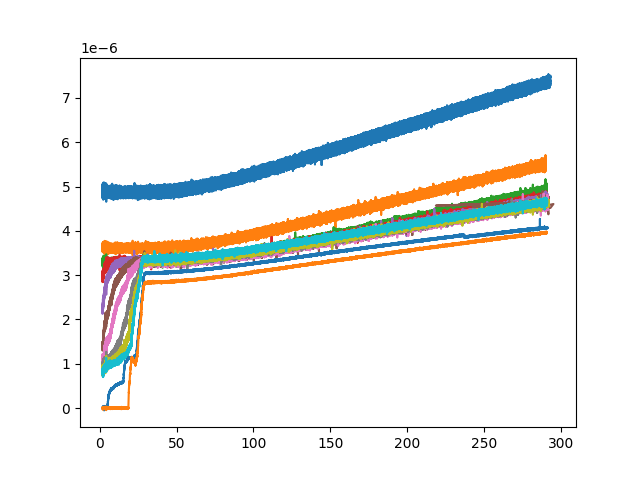

In [17]:
#plotting resistivity vs temperature
%matplotlib widget
i= 0
fig, ax = plt.subplots()
for i in range(len(Rdf_list)):
    R = Rdf_list[i].iloc[:,3].
    rho = R*1000*((np.pi*10)/np.log(2))*0.0001  #resistivity with units of mOhms-cm.
    ax.plot(Rdf_list[i].iloc[:,2],R)
    i = i+1


plt.show()

In [71]:
plt.close(fig)


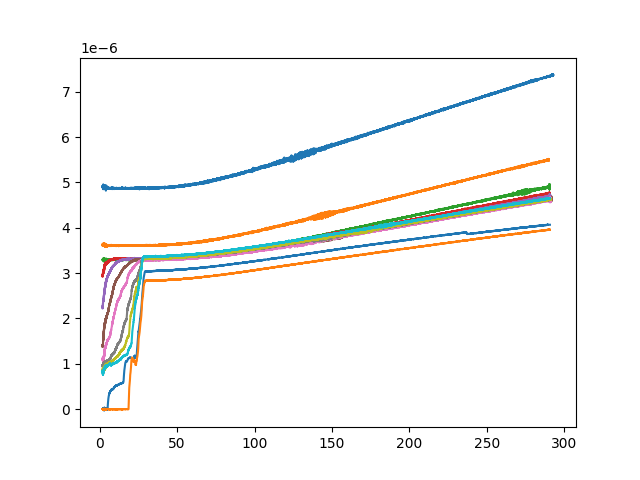

In [70]:
#plotting with smooted data
%matplotlib widget
i = 0
avg_w = 30; # averaging window
fig, ax = plt.subplots()
for i in range(len(Rdf_list)):
    R = Rdf_list[i].iloc[:,3].rolling(avg_w).mean()
    T = Rdf_list[i].iloc[:,2].rolling(avg_w).mean()
    rho = R*1000*((np.pi*10)/np.log(2))*0.0001  #resistivity with units of mOhms-cm.
    ax.plot(T,R)
    i = i+1


In [73]:
exit